In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import json
import cv2
import math
from copy import deepcopy

In [2]:
with open('accuracy_size.json', 'r') as f:
    data = json.load(f)
with open("accuracy_size_frozen.json", "r") as f:
    data_frozen = json.load(f)

In [3]:
data

{'0.0625': [0.625, 0.75, 0.765625, 0.546875, 0.734375],
 '0.125': [0.828125, 0.390625, 0.71875, 0.6875, 0.625],
 '0.1875': [0.515625, 0.359375, 0.609375, 0.234375, 0.21875],
 '0.25': [0.265625, 0.40625, 0.5, 0.828125, 0.234375],
 '0.3125': [0.3125, 0.859375, 0.4375, 0.734375, 0.671875]}

In [4]:
data_frozen

{'0.0625': [0.703125, 0.625, 0.546875, 0.46875, 0.671875],
 '0.125': [0.78125, 0.75, 0.75, 0.671875, 0.703125],
 '0.1875': [0.78125, 0.84375, 0.8125, 0.78125, 0.765625]}

In [8]:
averages = []
errors = []
keys = []
for key in data_frozen.keys():
    averages.append([np.mean(data_frozen[key]), np.mean(data[key])])
    errors.append([
        np.std(data_frozen[key])/math.sqrt(len(data_frozen[key])),
        np.std(data[key])/math.sqrt(len(data[key]))
    ])
    keys.append(key)
averages = np.array(averages)
errors = np.array(errors)

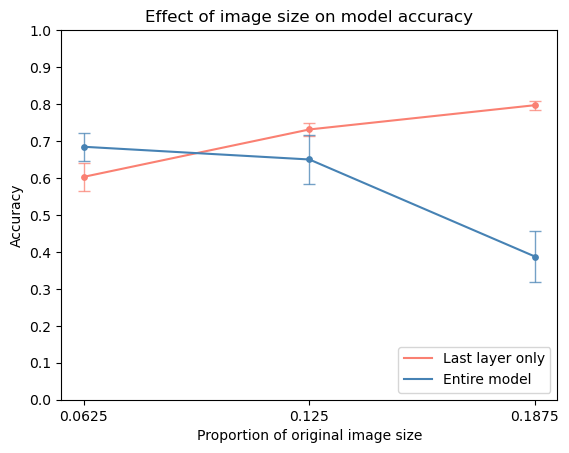

In [33]:
fig, ax = plt.subplots()
ax.plot(keys, averages[:, 0], c="salmon", label="Last layer only")
ax.plot(keys, averages[:, 1], c="steelblue", label="Entire model")
ax.errorbar(keys, averages[:, 0], yerr=errors[:, 0], c="salmon", ecolor="salmon", ls="None", elinewidth=1, capsize=4, alpha=0.75)
ax.errorbar(keys, averages[:, 1], yerr=errors[:, 1], c="steelblue", ecolor="steelblue", ls="None", elinewidth=1, capsize=4, alpha=0.75)
ax.scatter(keys, averages[:, 0], c="salmon", s=15)
ax.scatter(keys, averages[:, 1], c="steelblue", s=15)
ax.set_ylim([0, 1])
ax.set_yticks(np.arange(0, 1.1, 0.1))
# ax.set_xlim([0, 0.25])
# ax.set_xticks(np.arange(0, 0.25, 0.05))
ax.set_xlabel("Proportion of original image size")
ax.set_ylabel("Accuracy")
ax.set_title("Effect of image size on model accuracy")
ax.legend(loc="lower right")
plt.show()